# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dandy Aurrellio Pradana
- **Email:** gdandipradana13@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Musim Apa yang Memiliki Jumlah Pengguna Sepeda Tertinggi dan Terendah?
- Bagaimana Cuaca Mempengaruhi Penggunaan Sepeda?
- Apakah Penggunaan Sepeda Lebih Tinggi pada Akhir Pekan atau Hari Kerja?
- Pada Jam Berapa Penggunaan Sepeda Paling Tinggi dan Terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\data1.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\2958441626.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("data\data1.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\data2.csv")
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\3505653606.py:1: SyntaxWarning: invalid escape sequence '\d'
  hour_df = pd.read_csv("data\data2.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini berisi informasi penggunaan sepeda di berbagai musim.
- Data juga mencakup variabel seperti cuaca, jumlah pengguna terdaftar, dan pengguna kasual.

### Assessing Data

In [4]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


**Insight:**
- Saya mengubah tipe data object pada kolom dteday menjadi tipe data datetime

In [13]:
# Menghapus kolom yang tidak relevan dari day_df
day_df = day_df.drop(columns=['instant', 'temp', 'atemp', 'hum', 'windspeed'])

# Menghapus kolom yang tidak relevan dari hour_df
hour_df = hour_df.drop(columns=['instant', 'temp', 'atemp', 'hum', 'windspeed'])

**Insight :**
- Saya menghapus kolom instant karena hanya merupakan kolom rekaman index yang tidak saya butuhkan
- Lalu pada kolom temp, atemp, hum, dan windspeed saya menghapusnya karena menurut saya sudah diwakili kolom season

In [14]:
column_name = {
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_situation',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}

for df in [day_df, hour_df]:
    df.rename(columns=column_name, inplace=True)

**Insight :**
- Pada tahap ini melakukan penamaan kolom agar mudah dipahami

In [15]:
mappings = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'month': {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    },
    'weather_situation': {
        1: 'Clear',
        2: 'Misty',
        3: 'Light Snow',
        4: 'Heavy Rain + Ice Pallets'
    },
    'weekday': {
        0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
        4: 'Thursday', 5: 'Friday', 6: 'Saturday'
    },
    'year': {0: '2011', 1: '2012'}
}



**Insight :**
- Pada tahap ini melakukan penamaan dari sebelumnya bentuk int menjadi bentuk kategori misalnya pada year yaitu 0 menjadi 2011 dan 1 menjadi 2012 lalu.

In [16]:
for df in [day_df, hour_df]:
    df['season'] = df['season'].map(mappings['season']).astype('category')
    df['month'] = df['month'].map(mappings['month']).astype('category')
    df['weather_situation'] = df['weather_situation'].map(mappings['weather_situation']).astype('category')
    df['weekday'] = df['weekday'].map(mappings['weekday']).astype('category')
    df['year'] = df['year'].map(mappings['year']).astype('category')

**Insight :**
- Pada tahap ini melakukan perubahan tipe data pada kolom menjadi tipe data kategorik

In [17]:
day_df.head()

,date,season,year,month,holiday,weekday,working_day,weather_situation,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,82,1518,1600


In [18]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,working_day,weather_situation,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_df.groupby(by="season").agg({
    'total_users'  : ['min','max','mean']
}).sort_values(('total_users','mean'), ascending = False)

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\2866573547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


total_users                   
               min   max         mean
season                               
Fall          1115  8714  5644.303191
Summer         795  8362  4992.331522
Winter          22  8555  4728.162921
Spring         431  7836  2604.132597

**Insight 1 :**
Mengelompakknan total pengguna penyewaan sepeda berdasarkan empat musim, dari hasil tersebut didapatkan bahwa rata-rata penyewaan pesepeda paling banyak pada :
- Musim Gugur
- Musim Panas
- Musim Dingin
- Musim Gugur

In [20]:
day_df.groupby(by="weather_situation").agg({
    'total_users'  : ['min','max','mean']
}).sort_values(('total_users', 'mean'), ascending=False)

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\901812243.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weather_situation").agg({


total_users                   
                          min   max         mean
weather_situation                               
Clear                     431  8714  4876.786177
Misty                     605  8362  4035.862348
Light Snow                 22  4639  1803.285714

**Insight 2 :**
Berdasarkan diatas,  penyewaan sepeda lebih tinggi pada cuaca cerah dan berkabut, sedangkan pada cuaca bersalju/hujan lebih rendah.

In [21]:
day_df.groupby(by="month").agg({
    'total_users'  : ['min','max','mean']
}).sort_values(('total_users', 'mean'), ascending=False)

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\827896862.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="month").agg({


total_users                   
              min   max         mean
month                               
Jun          3767  8120  5772.366667
Sep          1842  8714  5766.516667
Aug          1115  7865  5664.419355
Jul          3285  8173  5563.677419
May          2633  8294  5349.774194
Oct            22  8156  5199.225806
Apr           795  7460  4484.900000
Nov          1495  6852  4247.183333
Mar           605  8362  3692.258065
Dec           441  6606  3403.806452
Feb          1005  5062  2655.298246
Jan           431  4521  2176.338710

**Insight 3 :**
Berdasarkan data diatas yaitu bahwa bulan Juni hingga September adalah rata-rata tertinggi penyewaan sepeda.

In [22]:
hour_df.groupby(by="hour").agg({
    'total_users'  : ['min','max','mean']
}).sort_values(('total_users', 'mean'), ascending=False)

total_users                 
             min  max        mean
hour                             
17            15  976  461.452055
18            23  977  425.510989
8              5  839  359.011004
16            11  783  311.983562
19            11  743  311.523352
13            11  760  253.661180
12             3  776  253.315934
15             7  750  251.233196
14            12  750  240.949246
20            11  567  226.030220
9             14  426  219.309491
7              1  596  212.064649
11            10  663  208.143054
10             8  539  173.668501
21             6  584  172.314560
22             9  502  131.335165
23             2  256   87.831044
6              1  213   76.044138
0              2  283   53.898072
1              1  168   33.375691
2              1  132   22.869930
5              1   66   19.889819
3              1   79   11.727403
4              1   28    6.352941

**Insight 4 :**
Pada data di atas bahwa 3 tertinggi pada nilai rata-rata terjadi pada jam 5 dan 6 sore, lalu disusul pada pukul 8 pagi. Namun hingga pada data berikutnya hingga 10 besar bahwa penyewaan sepeda tertinggi terjadi pada rentang pukul 12 siang hingga pukul 8 malam.

In [23]:
day_df.replace({'working_day': {1: 'Yes', 0: 'No'}}).groupby(by='working_day').agg({
    'total_users': ['min', 'max', 'mean']
})

total_users                   
                    min   max         mean
working_day                               
No                  605  8714  4330.168831
Yes                  22  8362  4584.820000

**Insight 5 :**
Pada data diatas bahwa penyewaan sepeda sering digunakan pada hari kerja dibandingkan hari libur walaupun berdasarkan nilai rata-rata tidak memiliki perbedaan yang jauh

In [24]:
day_df.replace({'holiday': {1: 'Yes', 0: 'No'}}).groupby(by='holiday').agg({
    'total_users': ['min', 'max', 'mean']
})

total_users                   
                min   max         mean
holiday                               
No               22  8714  4527.104225
Yes            1000  7403  3735.000000

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Musim Apa yang Memiliki Jumlah Pengguna Sepeda Tertinggi dan Terendah?

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\1538714347.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='total_users', data=day_df, ax=ax1, color='#4682B4', ci=None)


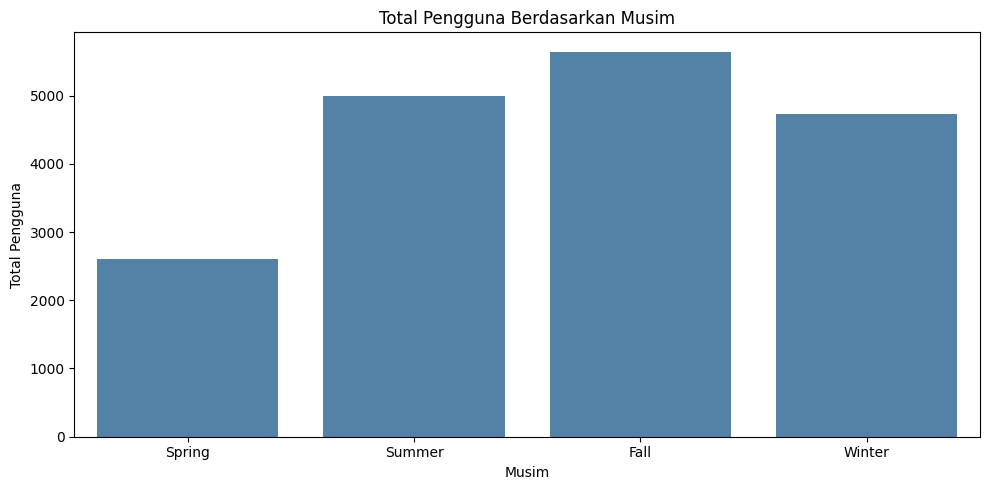

In [32]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
day_df['season'] = pd.Categorical(day_df['season'], categories=season_order, ordered=True)

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='season', y='total_users', data=day_df, ax=ax1, color='#4682B4', ci=None)
ax1.set_title('Total Pengguna Berdasarkan Musim')
ax1.set_xlabel('Musim')
ax1.set_ylabel('Total Pengguna')

plt.tight_layout()
plt.show()


**Insight:**
- Musim panas memiliki jumlah pengguna sepeda tertinggi, mungkin karena cuaca lebih bersahabat untuk bersepeda.
- Pengguna menurun selama musim dingin karena kondisi cuaca yang kurang mendukung.

### Pertanyaan 2 : Bagaimana Cuaca Mempengaruhi Penggunaan Sepeda?

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\3403102155.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_situation', y='registered_users', data=day_df, color='#4682B4', ci=None, label='Pengguna Terdaftar')  # Biru untuk pengguna terdaftar
C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\3403102155.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_situation', y='casual_users', data=day_df, color='#FFA500', ci=None, label='Pengguna Kasual')  # Orange untuk pengguna kasual


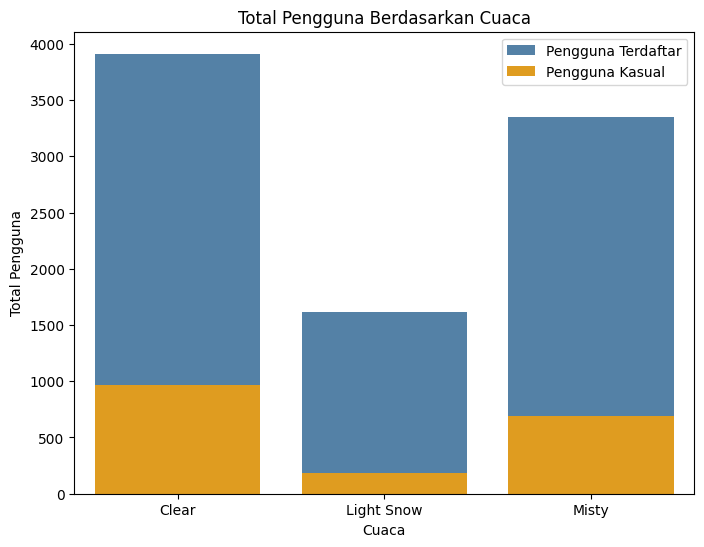

In [26]:
plt.figure(figsize=(8, 6))

sns.barplot(x='weather_situation', y='registered_users', data=day_df, color='#4682B4', ci=None, label='Pengguna Terdaftar')  # Biru untuk pengguna terdaftar
sns.barplot(x='weather_situation', y='casual_users', data=day_df, color='#FFA500', ci=None, label='Pengguna Kasual')  # Orange untuk pengguna kasual

plt.title('Total Pengguna Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Total Pengguna')

plt.legend()

plt.show()


**Insight:**
- Cuaca cerah meningkatkan jumlah pengguna sepeda, baik pengguna terdaftar maupun kasual.
- Penggunaan sepeda menurun signifikan ketika kondisi cuaca buruk.

### Pertanyaan 3 : Apakah Penggunaan Sepeda Lebih Tinggi pada Akhir Pekan atau Hari Kerja?

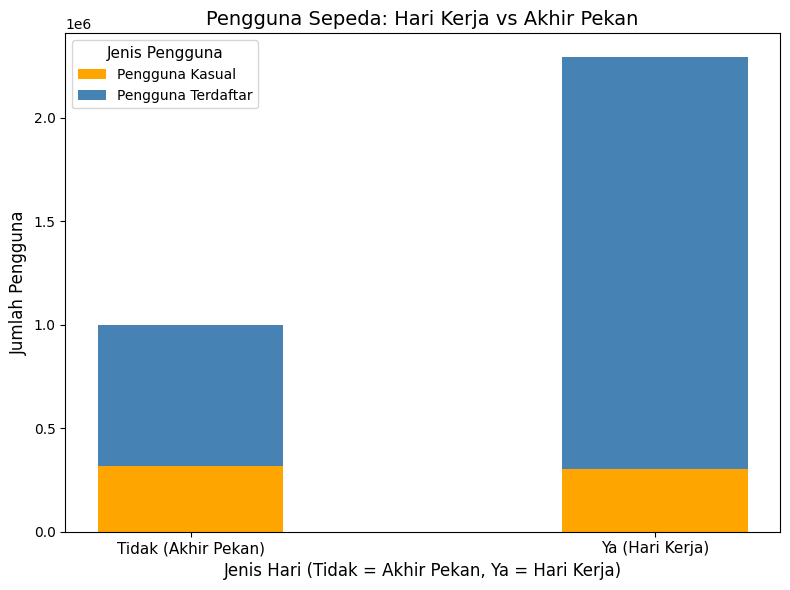

In [27]:
working_day_summary = hour_df.groupby('working_day')[['total_users', 'casual_users', 'registered_users']].sum()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
index = np.arange(len(working_day_summary))


ax.bar(index, working_day_summary['casual_users'], bar_width, label='Pengguna Kasual', color='#FFA500')
ax.bar(index, working_day_summary['registered_users'], bar_width, bottom=working_day_summary['casual_users'], label='Pengguna Terdaftar', color='#4682B4')

ax.set_xlabel('Jenis Hari (Tidak = Akhir Pekan, Ya = Hari Kerja)', fontsize=12)
ax.set_ylabel('Jumlah Pengguna', fontsize=12)
ax.set_title('Pengguna Sepeda: Hari Kerja vs Akhir Pekan', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(['Tidak (Akhir Pekan)', 'Ya (Hari Kerja)'], fontsize=11)

ax.legend(title='Jenis Pengguna', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


**Insight** :

- Penggunaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja, yang menunjukkan peningkatan aktivitas rekreasi.
- Sebaliknya, pengguna terdaftar cenderung lebih aktif pada hari kerja, kemungkinan untuk perjalanan ke tempat kerja atau sekolah.
- Penggunaan sepeda oleh pengguna kasual melonjak signifikan saat akhir pekan, menandakan penggunaan untuk aktivitas santai.

### Pertanyaan 4 : Pada Jam Berapa Penggunaan Sepeda Paling Tinggi dan Terendah?

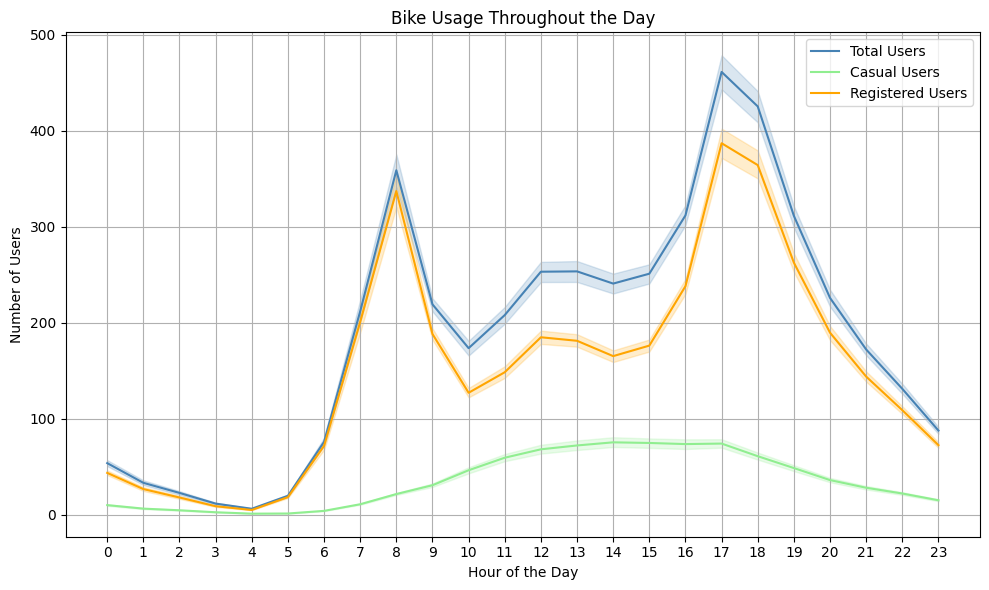

In [28]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='hour', y='total_users', data=hour_df, label='Total Users', color='#4682B4')  # Steel Blue untuk total users
sns.lineplot(x='hour', y='casual_users', data=hour_df, label='Casual Users', color='#90EE90')  # Light Green untuk casual users
sns.lineplot(x='hour', y='registered_users', data=hour_df, label='Registered Users', color='#FFA500')  # Orange untuk registered users

plt.title('Bike Usage Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Insight** :

- Penggunaan sepeda mencapai puncaknya pada pagi hari (7-9) dan sore hari (16-19), mengikuti pola perjalanan kerja.
- Penggunaan terendah terjadi pada tengah malam hingga dini hari (0-5), saat aktivitas masyarakat berkurang.
- Pengguna kasual lebih aktif pada sore hari, sedangkan pengguna terdaftar cenderung menggunakan sepeda pada pagi hari untuk perjalanan kerja atau sekolah.

## Analisis Lanjutan (Opsional)

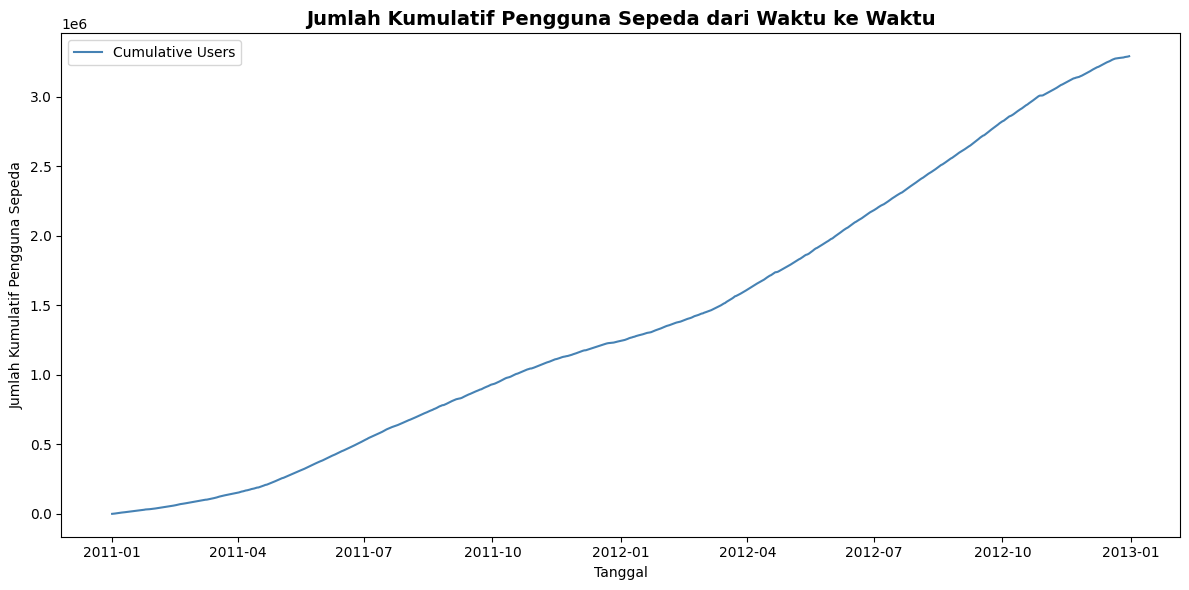

In [50]:
day_df_ts['Cumulative_Users'] = day_df_ts['total_users'].cumsum()

# Plot jumlah kumulatif pengguna sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x=day_df_ts.index, y='Cumulative_Users', data=day_df_ts, label='Cumulative Users', color='#4682B4')
plt.title('Jumlah Kumulatif Pengguna Sepeda dari Waktu ke Waktu', fontsize=14, fontweight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kumulatif Pengguna Sepeda')
plt.legend()
plt.tight_layout()
plt.show()


**Insight :**
- Dari visual tersebut menunjukkan tren pertumbuhan yang positif seiring waktu, mencerminkan minatnya masyarakat terhadap penggunaan sepeda sebagai sarana transportasi sehari-hari

C:\Users\Dandy Pradana\AppData\Local\Temp\ipykernel_12884\2245834130.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = hour_df.pivot_table(index='weekday', columns='hour', values='total_users', aggfunc='sum')


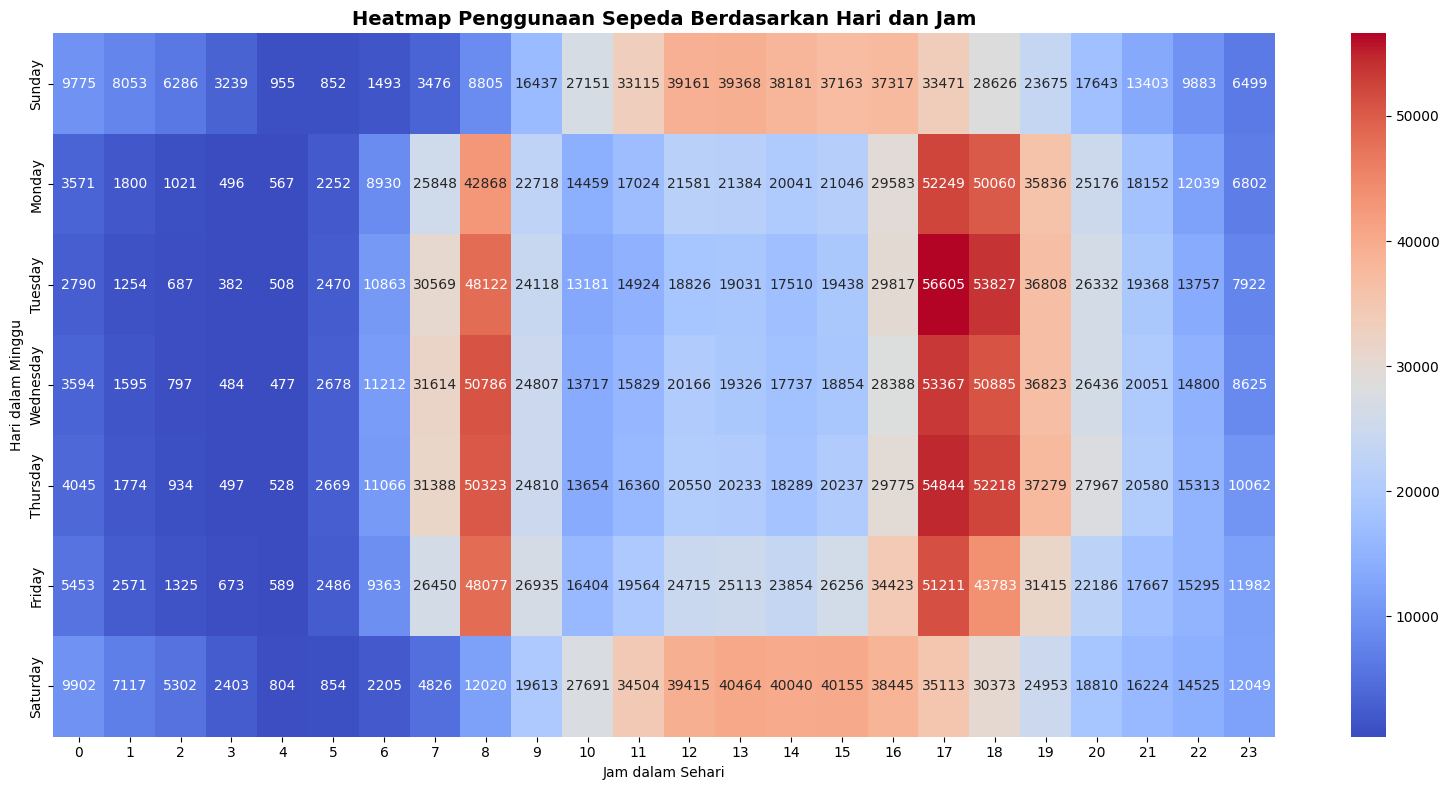

In [51]:

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=weekday_order, ordered=True)

heatmap_data = hour_df.pivot_table(index='weekday', columns='hour', values='total_users', aggfunc='sum')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Heatmap Penggunaan Sepeda Berdasarkan Hari dan Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Minggu')
plt.tight_layout()
plt.show()


**Insight :**
- Berdasarkan heatmap, warna yang lebih gelap menunjukkan bahwa penggunaan sepeda tertinggi terjadi pada hari kerja (weekday) pada jam 8 pagi serta pada pukul 17 dan 18.
- Sedangkan pada akhir pekan (weekend) atau hari libur (holiday), penggunaan sepeda tertinggi terlihat pada pukul 11 siang hingga 5 sore.

## Conclusion

- Total pengguna sepeda tertinggi terjadi pada musim panas dan musim gugur karena kedua musim ini dianggap ideal untuk melakukan aktivitas luar ruangan.    Cuaca yang hangat dan nyaman membuat orang lebih sering menggunakan sepeda. Sebaliknya, penggunaan sepeda mulai menurun pada musim dingin karena suhu yang sangat dingin dan kondisi cuaca yang tidak mendukung, seperti salju dan angin kencang. Musim semi juga menunjukkan penurunan jumlah pengguna sepeda karena merupakan masa peralihan dari musim dingin ke musim panas, di mana cuaca sering kali belum stabil, seperti masih adanya badai salju atau perubahan suhu dari dingin ke panas mebuat siang hari menjadi lebih panjang daripada malam.

- Pengguna sepeda lebih banyak menyewa saat cuaca cerah karena kondisi ini dianggap paling nyaman dan ideal untuk bersepeda. Cuaca berkabut juga masih cukup diminati meskipun visibilitas berkurang, namun tetap bisa ditoleransi oleh banyak orang. Sebaliknya, jumlah pengguna sepeda paling rendah saat turun salju ringan atau hujan ringan, karena kondisi seperti ini membuat jalan menjadi licin dan bersepeda terasa kurang nyaman, sehingga hanya sedikit orang yang mau bersepeda di tengah cuaca tersebut. Di samping itu, pengguna yang terdaftar atau langganan dalam penyewaan sepeda masih didominasi dibandingkan dengan pengguna casual yang hanya sesekali meminjam sepeda.

- Pengguna terdaftar dalam penyewaan sepeda (registered users) lebih sering melakukan penyewaan pada hari kerja dibandingkan pada hari libur. Hal ini menunjukkan bahwa pengguna terdaftar cenderung menggunakan sepeda sebagai sarana transportasi sehari-hari untuk pergi bekerja atau menjalankan aktivitas rutin. Di sisi lain, pengguna kasual (casual users), yang menyewa sepeda hanya sesekali, menunjukkan pola penggunaan yang lebih seimbang antara hari kerja dan akhir pekan.

- Pengguna terdaftar dalam penyewaan sepeda (registered users) menunjukkan pola yang jelas dalam penggunaan sepeda sepanjang hari, dengan peningkatan signifikan terjadi pada pukul 5 pagi hingga 8 pagi, yang merupakan waktu puncak ketika banyak orang berangkat kerja. Setelah mencapai titik tertinggi, jumlah pengguna terdaftar mulai menurun hingga pukul 10 pagi, namun kembali meningkat perlahan hingga pukul 12 siang dan tetap stabil hingga pukul 3 sore. Kenaikan yang cukup signifikan terlihat lagi pada pukul 5 sore, menunjukkan banyak pengguna terdaftar pulang kerja atau menyelesaikan aktivitas mereka di sore hari. Di sisi lain, pengguna kasual (casual users), yang menyewa sepeda hanya sesekali, menunjukkan pola yang berbeda dengan kenaikan landai dari pukul 6 pagi hingga 5 sore, namun setelah itu mengalami penurunan. Hal ini menunjukkan bahwa pengguna terdaftar lebih sering menggunakan sepeda untuk kegiatan sehari-hari, seperti berangkat kerja dan pulang, sementara pengguna kasual cenderung menggunakan sepeda untuk aktivitas rekreasi di siang hari.